# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ljmac\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
bitcoin_news

{'status': 'ok',
 'totalResults': 7951,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Richard Lawler',
   'title': 'A fake press release claiming Kroger accepts crypto reached the retailer’s own webpage',
   'description': 'A crypto hoax claimed Kroger is accepting Bitcoin Cash. The fake press release was similar to one targeting Walmart earlier this year. The retailer quickly confirmed it’s fake, but not before the cryptocurrency’s price spiked by $30.',
   'url': 'https://www.theverge.com/2021/11/5/22765098/kroger-bitcoin-cash-cryptocurrency-hoax-pump-dump',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/CKp0YjnwF88--mWg1kfPmspvfzY=/0x358:5000x2976/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22988084/1234440443.jpg',
   'publishedAt': '2021-11-05T13:32:14Z',
   'content': 'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\

In [5]:
# Fetch the Ethereum news articles
etherium_news = newsapi.get_everything(q="etherium", language="en", sort_by="relevancy")
etherium_news

{'status': 'ok',
 'totalResults': 25,
 'articles': [{'source': {'id': None, 'name': 'Boing Boing'},
   'author': 'Annie Rauwerda',
   'title': 'Fed up with the job search, a software engineer created a ridiculous fake resume and got a 90% response rate',
   'description': 'Angelina Lee is an expert in JavaScript, TypeScript, Node.js, React AI, and Mia Khalifa. When she worked at Instagram, she was the "team coffee maker" and mined Etherium on company servers. Before graduating "summa cum laude" at UC Berkeley, she achieved the …',
   'url': 'https://boingboing.net/2021/11/01/fed-up-with-the-job-search-a-software-engineer-created-a-ridiculous-fake-resume-and-got-a-90-response-rate.html',
   'urlToImage': 'https://i0.wp.com/boingboing.net/wp-content/uploads/2021/10/Screen-Shot-2021-10-31-at-22.39.36.png?fit=1200%2C650&ssl=1',
   'publishedAt': '2021-11-01T12:03:58Z',
   'content': 'Angelina Lee is an expert in JavaScript, TypeScript, Node.js, React AI, and Mia Khalifa. When she worked at

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass

# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
1,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781
2,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879
3,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904
4,2021-10-08,"Last week, the Wall Street Journal ran a piece...",0.3400,0.099,0.000,0.901


In [7]:
# Create the Ethereum sentiment scores DataFrame
etherium_sentiments = []

for article in etherium_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        etherium_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass

# Create DataFrame
etherium_df = pd.DataFrame(etherium_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
etherium_df = etherium_df[cols]

etherium_df.head()

,date,text,compound,positive,negative,neutral
0,2021-11-01,"Angelina Lee is an expert in JavaScript, TypeS...",-0.2960,0.000,0.061,0.939
1,2021-10-20,AppleInsider is supported by its audience and ...,0.4588,0.121,0.000,0.879
2,2021-11-05,When the largest Islamic organization in Indon...,0.1280,0.049,0.000,0.951
3,2021-10-07,It’s been a good week for cryptocurrency trade...,0.5719,0.139,0.000,0.861
4,2021-11-04,From Gigabyte's VISION series of graphics card...,0.6166,0.132,0.000,0.868


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.289570,0.080300,0.003150,0.91655
std,0.297004,0.076913,0.014087,0.07471
min,-0.273200,0.000000,0.000000,0.78100
25%,0.000000,0.000000,0.000000,0.87425
50%,0.350600,0.097500,0.000000,0.90250
75%,0.514625,0.125750,0.000000,1.00000
max,0.755800,0.219000,0.063000,1.00000


In [9]:
# Describe the Ethereum Sentiment
etherium_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.342750,0.103950,0.02190,0.874150
std,0.345179,0.072302,0.03545,0.079452
min,-0.296000,0.000000,0.00000,0.712000
25%,0.096000,0.063250,0.00000,0.836750
50%,0.411100,0.119500,0.00000,0.865000
75%,0.593575,0.139000,0.05950,0.933500
max,0.888500,0.258000,0.09800,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: The highest mean positive score was Etherium with a total of 0.10395.

Q: Which coin had the highest compound score?

A: The highest (max) compound score was Etherium again with a total of 0.88850, its mean compound score of 0.34275.

Q. Which coin had the highest positive score?

A: Etherium had the highest (max) positive score coming in at 0.258, its mean positive score of 0.10395.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ljmac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))


# Expand the default stopwords list if necessary
#sw_addon = {'ha', 'wa'}




In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    

    # Remove the stop words
    #second_result = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
    
    return tokens
    

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
1,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781,"[high, chance, bitcoin, sustaining, gain, push..."
2,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879,"[specifically, someone, make, massive, purchas..."
3,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904,"[theres, big, new, presence, slurping, power, ..."
4,2021-10-08,"Last week, the Wall Street Journal ran a piece...",0.3400,0.099,0.000,0.901,"[last, week, wall, street, journal, ran, piece..."


In [14]:
# Create a new tokens column for Ethereum
etherium_df['tokens'] = etherium_df.text.apply(tokenizer)
etherium_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-01,"Angelina Lee is an expert in JavaScript, TypeS...",-0.2960,0.000,0.061,0.939,"[angelina, lee, expert, javascript, typescript..."
1,2021-10-20,AppleInsider is supported by its audience and ...,0.4588,0.121,0.000,0.879,"[appleinsider, supported, audience, may, earn,..."
2,2021-11-05,When the largest Islamic organization in Indon...,0.1280,0.049,0.000,0.951,"[largest, islamic, organization, indonesia, la..."
3,2021-10-07,It’s been a good week for cryptocurrency trade...,0.5719,0.139,0.000,0.861,"[good, week, cryptocurrency, trader, wednesday..."
4,2021-11-04,From Gigabyte's VISION series of graphics card...,0.6166,0.132,0.000,0.868,"[gigabytes, vision, series, graphic, card, cre..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Join all Bitcoin articles in one large string
#bitcoin_df_text = bitcoin_df.text.apply(tokenizer)
bitcoin_df_text = tokenizer(bitcoin_df.text.str.cat())
bitcoin_df_text
#def word_counter(corpus): 
#    # Combine all articles in corpus into one large string
#    big_string = ' '.join(corpus)
#    processed = process_text(big_string)
#    top_10 = dict(Counter(processed).most_common(10))
#    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

#word_counter(corpus)

['similar',
 'hoax',
 'earlier',
 'year',
 'tied',
 'walmart',
 'litecoinif',
 'buy',
 'something',
 'verge',
 'link',
 'vox',
 'media',
 'may',
 'earn',
 'commission',
 'see',
 'ethic',
 'statementphoto',
 'illustration',
 'thiago',
 'prudencios',
 'charshow',
 'high',
 'chance',
 'bitcoin',
 'sustaining',
 'gain',
 'pushing',
 'altcoins',
 'higherfrom',
 'utoday',
 'httpsiftttbkdpx',
 'httpsifttteavjspecifically',
 'someone',
 'make',
 'massive',
 'purchase',
 'billion',
 'worth',
 'bitcoin',
 'wednesday',
 'couple',
 'minuteswhile',
 'many',
 'see',
 'huge',
 'buy',
 'signal',
 'bullishness',
 'may',
 'charstheres',
 'big',
 'new',
 'presence',
 'slurping',
 'power',
 'us',
 'grid',
 'growing',
 'bitcoin',
 'miner',
 'new',
 'research',
 'show',
 'us',
 'ha',
 'overtaken',
 'china',
 'top',
 'global',
 'destination',
 'bitcoin',
 'mining',
 'charslast',
 'week',
 'wall',
 'street',
 'journal',
 'ran',
 'piece',
 'three',
 'recent',
 'nuclearbitcoin',
 'deal',
 'may',
 'signal',
 'gr

In [17]:
# Generate the Bitcoin N-grams where N=2

bigram_btc_counts = Counter(ngrams(bitcoin_df_text, n=2))
print(dict(bigram_btc_counts))

{('similar', 'hoax'): 1, ('hoax', 'earlier'): 1, ('earlier', 'year'): 1, ('year', 'tied'): 1, ('tied', 'walmart'): 1, ('walmart', 'litecoinif'): 1, ('litecoinif', 'buy'): 1, ('buy', 'something'): 1, ('something', 'verge'): 1, ('verge', 'link'): 1, ('link', 'vox'): 1, ('vox', 'media'): 1, ('media', 'may'): 1, ('may', 'earn'): 1, ('earn', 'commission'): 1, ('commission', 'see'): 1, ('see', 'ethic'): 1, ('ethic', 'statementphoto'): 1, ('statementphoto', 'illustration'): 1, ('illustration', 'thiago'): 1, ('thiago', 'prudencios'): 1, ('prudencios', 'charshow'): 1, ('charshow', 'high'): 1, ('high', 'chance'): 1, ('chance', 'bitcoin'): 1, ('bitcoin', 'sustaining'): 1, ('sustaining', 'gain'): 1, ('gain', 'pushing'): 1, ('pushing', 'altcoins'): 1, ('altcoins', 'higherfrom'): 1, ('higherfrom', 'utoday'): 1, ('utoday', 'httpsiftttbkdpx'): 1, ('httpsiftttbkdpx', 'httpsifttteavjspecifically'): 1, ('httpsifttteavjspecifically', 'someone'): 1, ('someone', 'make'): 1, ('make', 'massive'): 1, ('massive

In [18]:
# Join all Etherium articles in one large string

etherium_df_text = tokenizer(etherium_df.text.str.cat())
etherium_df_text

['angelina',
 'lee',
 'expert',
 'javascript',
 'typescript',
 'nodejs',
 'react',
 'ai',
 'mia',
 'khalifa',
 'worked',
 'instagram',
 'wa',
 'team',
 'coffee',
 'maker',
 'mined',
 'etherium',
 'company',
 'server',
 'gr',
 'charsappleinsider',
 'supported',
 'audience',
 'may',
 'earn',
 'commission',
 'amazon',
 'associate',
 'affiliate',
 'partner',
 'qualifying',
 'purchase',
 'affiliate',
 'partnership',
 'influence',
 'editorial',
 'con',
 'charswhen',
 'largest',
 'islamic',
 'organization',
 'indonesia',
 'largest',
 'islamic',
 'country',
 'make',
 'ruling',
 'tends',
 'make',
 'headline',
 'following',
 'bahtsul',
 'masail',
 'nonbinding',
 'legal',
 'discussion',
 'east',
 'ja',
 'charsits',
 'good',
 'week',
 'cryptocurrency',
 'trader',
 'wednesday',
 'bitcoin',
 'surged',
 'fivemonth',
 'high',
 'according',
 'coindesk',
 'main',
 'reason',
 'cnbc',
 'report',
 'treasury',
 'secretary',
 'janet',
 'charsfrom',
 'gigabytes',
 'vision',
 'series',
 'graphic',
 'card',
 'c

In [19]:
# Generate the Ethereum N-grams where N=2
bigram_eth_counts = Counter(ngrams(etherium_df_text, n=2))
print(dict(bigram_eth_counts))

{('angelina', 'lee'): 1, ('lee', 'expert'): 1, ('expert', 'javascript'): 1, ('javascript', 'typescript'): 1, ('typescript', 'nodejs'): 1, ('nodejs', 'react'): 1, ('react', 'ai'): 1, ('ai', 'mia'): 1, ('mia', 'khalifa'): 1, ('khalifa', 'worked'): 1, ('worked', 'instagram'): 1, ('instagram', 'wa'): 1, ('wa', 'team'): 1, ('team', 'coffee'): 1, ('coffee', 'maker'): 1, ('maker', 'mined'): 1, ('mined', 'etherium'): 1, ('etherium', 'company'): 1, ('company', 'server'): 1, ('server', 'gr'): 1, ('gr', 'charsappleinsider'): 1, ('charsappleinsider', 'supported'): 1, ('supported', 'audience'): 1, ('audience', 'may'): 1, ('may', 'earn'): 1, ('earn', 'commission'): 1, ('commission', 'amazon'): 1, ('amazon', 'associate'): 1, ('associate', 'affiliate'): 1, ('affiliate', 'partner'): 1, ('partner', 'qualifying'): 1, ('qualifying', 'purchase'): 1, ('purchase', 'affiliate'): 1, ('affiliate', 'partnership'): 1, ('partnership', 'influence'): 1, ('influence', 'editorial'): 1, ('editorial', 'con'): 1, ('con',

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top_10 = token_count(bitcoin_df_text,(10))
bitcoin_top_10

[('bitcoin', 22),
 ('us', 7),
 ('reuters', 6),
 ('may', 5),
 ('commission', 5),
 ('illustration', 5),
 ('new', 5),
 ('exchange', 5),
 ('etf', 5),
 ('high', 4)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
etherium_top_10 = token_count(etherium_df_text,(10))
etherium_top_10

[('ha', 7),
 ('cryptocurrency', 5),
 ('year', 5),
 ('wa', 4),
 ('week', 3),
 ('wednesday', 3),
 ('high', 3),
 ('nfts', 3),
 ('called', 3),
 ('finance', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

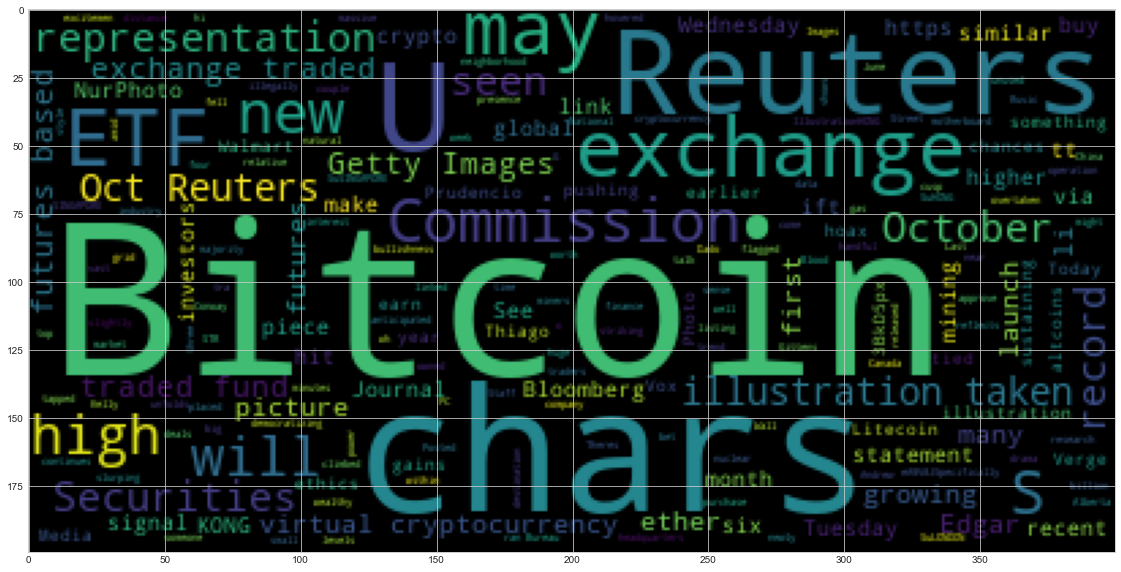

In [24]:
# Generate the Bitcoin word cloud
wc_btc = WordCloud().generate(bitcoin_df.text.str.cat())
plt.imshow(wc_btc)

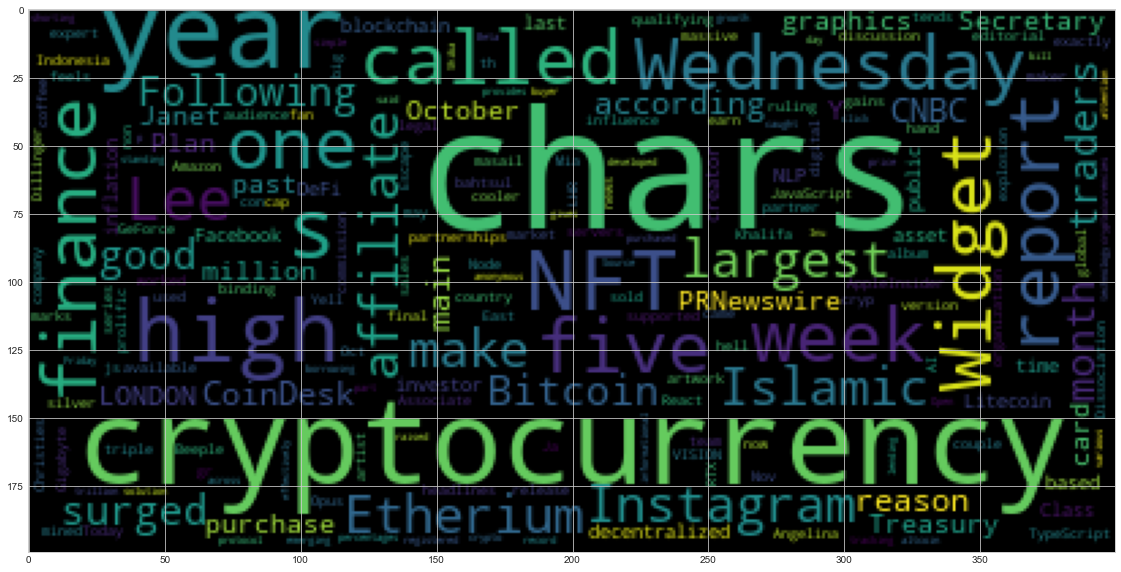

In [25]:
# Generate the Ethereum word cloud
wc_eth = WordCloud().generate(etherium_df.text.str.cat())
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm


In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
all_btc_text = bitcoin_df.text.str.cat()
all_btc_text

'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]How high are the chances of Bitcoin sustaining its gains and pushing altcoins higher?from U.Today https://ift.tt/3BkD5px https://ift.tt/eA8V8JSpecifically, why did someone make a massive purchase of $1.6 billion worth of bitcoin on Wednesday in a couple of minutes?\r\nWhile many see this huge buy as a signal of bullishness, there may be more… [+8443 chars]Theres a big new presence slurping up power from the U.S. grid, and its growing: bitcoin miners. New research shows that the U.S. has overtaken China as the top global destination for bitcoin mining … [+3088 chars]Last week, the Wall Street Journal ran a piece on three recent nuclear-bitcoin deals that may signal a growing trend in the industry. The Journal piece reflects a small but growing sense of excitemen… [+9512 c

In [30]:
# Run the NER processor on all of the text
btc_doc = nlp(all_btc_text)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [31]:
# Render the visualization
displacy.render(btc_doc, style='ent', jupyter=True)

In [32]:
# List all Entities
print([ent.text for ent in btc_doc.ents if ent.label_])

['earlier this year', 'Verge', 'Vox Media', 'Thiago Prudencio/S', '$1.6 billion', 'Wednesday', 'a couple of minutes', 'U.S.', 'U.S.', 'China', 'the Wall Street Journal', 'three', 'Journal', 'Bitcoin', 'Bloomberg', 'the National Bureau', 'Canada', 'Bitcoin', 'Alberta', 'Link Global', 'June 29, 2021', 'REUTERS', 'Dado Ruvic/IllustrationHONG KONG', 'Oct 21', 'Reuters', 'October 19, 2021', 'REUTERS', 'Edgar SuLONDON', 'Oct 20', 'Reuters', 'Exchange Commission', 'Andrew Kelly', 'The US Securities and Exchange Commission', 'as many as four', 'October', 'October 18, 2021', 'REUTERS', 'Edgar SuSINGAPORE', 'Oct 19', 'Reuters', 'six-month', 'October 19, 2021', 'REUTERS', 'Edgar SuHONG KONG', 'Oct 20', 'Reuters', 'Wednesday', 'first', 'U.S.', 'Conway G. Gittens', 'Reuters', 'Reuters', 'six-month', 'Tuesday', 'U.S.', 'NurPhoto', 'Getty Images', 'first', 'Tuesday', 'ProShares', '2021', 'Marco Bello', 'The Securities and Exchange Commission', 'Valkyrie', 'ETF', 'US', 'ETF', 'The US Securities and Ex

---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
all_eth_text = etherium_df.text.str.cat()
all_eth_text

'Angelina Lee is an expert in JavaScript, TypeScript, Node.js, React AI, and Mia Khalifa. When she worked at Instagram, she was the "team coffee maker" and mined Etherium on company servers. Before gr… [+764 chars]AppleInsider is supported by its audience and may earn commission as an Amazon Associate and affiliate partner on qualifying purchases. These affiliate partnerships do not influence our editorial con… [+1056 chars]When the largest Islamic organization in Indonesia, the largest Islamic country, makes a ruling, it tends to make headlines. Following a "bahtsul masail," or non-binding legal discussion, the East Ja… [+4078 chars]It’s been a good week for cryptocurrency traders. On Wednesday, Bitcoin surged to a five-month high of $55,735.52, according to CoinDesk. The main reason? CNBC reports that Treasury Secretary Janet Y… [+1325 chars]From Gigabyte\'s VISION series of graphics cards for creators, a GeForce RTX 3070 graphics card with a silver triple fan cooler is now available

In [34]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Etherium NER"

In [35]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [36]:
# List all Entities
print([ent.text for ent in eth_doc.ents if ent.label_])

['Angelina Lee', 'JavaScript', 'Node.js', 'React AI', 'Mia Khalifa', 'Instagram', 'Amazon Associate', 'Islamic', 'Indonesia', 'Islamic', 'a good week', 'Wednesday', 'five-month', '55,735.52', 'CoinDesk', 'CNBC', 'Treasury', 'Janet Y', "Gigabyte's", 'GeForce', 'LHR', 'Nov. 5, 2021', 'the past couple of years', 'five years', 'The Dillinger Escape Plan’s', 'Dissociation', 'October 14, 2016', 'five years', 'Oct. 29, 2021', 'the past year', 'One', 'Beeple', 'NFT', '$69 million', 'Christies', 'a good week', 'Wednesday', '5-month', '55,735.52', 'CoinDesk', 'CNBC', 'Treasury', 'Janet Yell', 'Wednesday, October 27', '$2.48 trillion', 'Shiba Inu', '277', 'one', 'Friday', '$5.75 million', 'Cryptocurrency-Widget', 'DeFi', 'DeFi', 'American', "Jim Cramer's", 'Thursday', "Facebook's\xa0 (FB) -", 'last year', 'four', 'thirty', 'Bored Ape Yacht Club', '10,000', 'Last week', 'YouTube', 'Instagram', 'Japan', 'eight-year-old', 'Charlie Lee', '10th', 'Learning', 'Natural Language Processing', 'Some time a

---